# Working on analysis part of topic modeling

- keyword data

This uses main "pyLDAvis" results and build on it

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
import sys
import re, numpy as np, pandas as pd

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import plotly
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go

In [5]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [6]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Loading file

In [7]:
import pickle

In [8]:
#p_firm = pd.read_pickle('patent_firm_full_clean.pkl')
#p_firm.shape

In [9]:
patent = pd.read_pickle('eda.pkl')
patent.shape

(68762, 38)

In [10]:
patent.head(2)

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date,year
0,0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,...,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990
1,1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990


In [11]:
#data_work = pd.read_pickle('work_on_data.pkl')
#data_work.shape

In [12]:
data = pd.read_pickle('top08_topic_dominant.pkl')
data.shape

(68762, 5)

### select useful features only

In [13]:
data.head(2)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.4003,"charge, battery, power, electric, energy, syst...","[electrical, energy, system, include, electric..."
1,1,1.0,0.8034,"charge, battery, power, electric, energy, syst...","[electrical, energy, system, include, electric..."


In [14]:
data.Dominant_Topic.value_counts()

3.0    20742
7.0    11500
0.0    10697
4.0     9647
1.0     8194
5.0     3718
6.0     3131
2.0     1133
Name: Dominant_Topic, dtype: int64

In [15]:
data['Topic']=data.Dominant_Topic.map({3.0:'topic1', 7.0:'topic2',0.0 :'topic3',4.0:'topic4', 1.0: 'topic5',
                                                         5.0 : 'topic6', 6.0: 'topic7', 2.0:'topic8'})

In [16]:
data.Topic.value_counts()

topic1    20742
topic2    11500
topic3    10697
topic4     9647
topic5     8194
topic6     3718
topic7     3131
topic8     1133
Name: Topic, dtype: int64

**Create a dataframe for working on paper**

In [17]:
work_on_paper=data
work_on_paper.drop(['Text','Document_No','Dominant_Topic'], axis=1, inplace=True)

In [18]:
work_on_paper['Assignee']=patent.assignee
work_on_paper['Year']=patent.year
work_on_paper['Abstract']=patent.appln_abstr

In [19]:
work_on_paper.head()

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
0,0.4003,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
1,0.8034,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
2,0.2962,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...
3,0.5153,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...
4,0.4787,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...


In [20]:
work_on_paper.shape

(68762, 6)

In [21]:
#work_on_paper['Topic']=work_on_paper.Dominant_Topic.map({0:'topic1', 3:'topic2',1 :'topic3',7:'topic4', 4: 'topic5',2 : 'topic6', 6: 'topic7', 5:'topic8'})

In [22]:
work_on_paper.Topic.value_counts()

topic1    20742
topic2    11500
topic3    10697
topic4     9647
topic5     8194
topic6     3718
topic7     3131
topic8     1133
Name: Topic, dtype: int64

In [23]:
#work_on_paper.Dominant_Topic.value_counts()

In [24]:
#work_on_paper.drop(['Dominant_Topic'], axis=1, inplace=True)

In [25]:
#work_on_paper.head(2)

In [26]:
work_on_paper.to_pickle('work_on_paper.pkl')

# 4)-After Modeling

We shall use already saved file "work_on_paper.pkl". It has topics in pyvis order

### 4a) Change in the number of patents 

In [27]:
data = pd.read_pickle('work_on_paper.pkl')

In [28]:
data.head()

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
0,0.4003,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
1,0.8034,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
2,0.2962,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...
3,0.5153,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...
4,0.4787,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...


In [29]:
data.Topic.value_counts()

topic1    20742
topic2    11500
topic3    10697
topic4     9647
topic5     8194
topic6     3718
topic7     3131
topic8     1133
Name: Topic, dtype: int64

In [30]:
data.shape

(68762, 6)

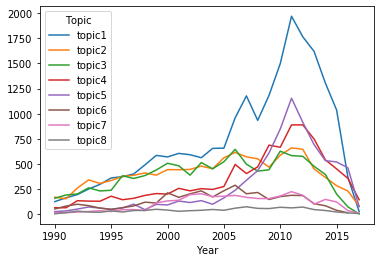

In [31]:
d=data
d=d.groupby(["Year","Topic"]).size()
d=d.unstack('Topic')
d.plot()

# Using plotly

In [69]:
d=data

In [70]:
d=d.groupby(["Year","Topic"]).size()

In [71]:
d.head()

Year    Topic 
1990.0  topic1    158
        topic2     70
        topic3    159
        topic4    123
        topic5     84
dtype: int64

In [72]:
df_patent=d.unstack('Topic')

In [73]:
type(df_patent)

pandas.core.frame.DataFrame

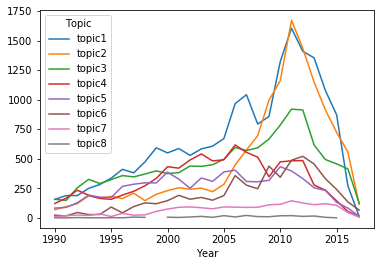

In [74]:
df_patent.plot()

In [75]:
df_patent2=df_patent.T

In [76]:
df_patent2

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Topic,,,,,,,,,,,,,,,,,,,,,
topic1,158.0,190.0,190.0,251.0,284.0,337.0,412.0,382.0,475.0,594.0,...,795.0,859.0,1323.0,1606.0,1410.0,1355.0,1080.0,873.0,272.0,14.0
topic2,70.0,96.0,122.0,188.0,168.0,183.0,165.0,210.0,147.0,201.0,...,697.0,997.0,1161.0,1673.0,1435.0,1151.0,915.0,725.0,558.0,116.0
topic3,159.0,149.0,256.0,327.0,292.0,325.0,359.0,348.0,372.0,399.0,...,594.0,668.0,786.0,921.0,914.0,619.0,495.0,458.0,416.0,126.0
topic4,123.0,168.0,235.0,193.0,166.0,158.0,194.0,226.0,273.0,335.0,...,515.0,349.0,475.0,484.0,486.0,279.0,236.0,146.0,55.0,13.0
topic5,84.0,90.0,129.0,193.0,177.0,173.0,268.0,286.0,298.0,297.0,...,307.0,319.0,434.0,398.0,334.0,256.0,234.0,133.0,84.0,14.0
topic6,24.0,18.0,47.0,29.0,30.0,93.0,44.0,97.0,128.0,121.0,...,248.0,439.0,345.0,489.0,522.0,457.0,333.0,242.0,136.0,67.0
topic7,11.0,20.0,25.0,22.0,35.0,13.0,39.0,24.0,27.0,56.0,...,91.0,112.0,116.0,146.0,127.0,113.0,121.0,107.0,47.0,7.0
topic8,2.0,1.0,4.0,2.0,2.0,3.0,2.0,8.0,6.0,NaN,...,12.0,11.0,19.0,20.0,14.0,17.0,6.0,2.0,NaN,2.0


In [77]:
traces=[go.Scatter(
    x=df_patent2.columns,
    y=df_patent2.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in df_patent2.index]

In [78]:
data=traces

In [79]:
layout=go.Layout(
title='Change in the number of patents over filling years',
xaxis=dict(title='Number of filling years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [80]:
#layout=go.Layout(title='Change in the number of patents over filling years')

In [81]:
figure1= go.Figure(data=data, layout=layout)

In [82]:
pyo.plot(figure1,filename='Change in the number of patents.html')

'Change in the number of patents.html'

**Alternative way**

In [83]:
data = pd.read_pickle('work_on_paper.pkl')

In [84]:
f=data.groupby(data.Year).Topic.value_counts()

In [85]:
f=f.unstack('Topic')

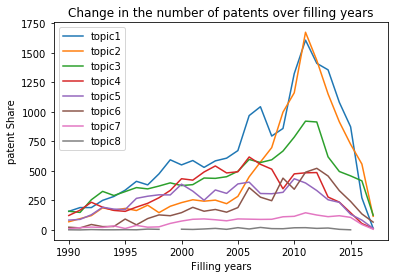

In [86]:
f.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the number of patents over filling years')
plt.legend()
plt.show()

**result of figure 4a**

### 4(b) Change in the share of patents over filing year

In [87]:
data.Topic.value_counts(normalize=True)

topic1    0.267662
topic2    0.196271
topic3    0.185233
topic4    0.133039
topic5    0.105145
topic6    0.080859
topic7    0.028519
topic8    0.003272
Name: Topic, dtype: float64

In [88]:
data.groupby(data.Year).Topic.value_counts(normalize=True)

Year    Topic 
1990.0  topic3    0.251981
        topic1    0.250396
        topic4    0.194929
        topic5    0.133122
        topic2    0.110935
                    ...   
2017.0  topic1    0.038997
        topic5    0.038997
        topic4    0.036212
        topic7    0.019499
        topic8    0.005571
Name: Topic, Length: 222, dtype: float64

In [89]:
c=data.groupby(data.Year).Topic.value_counts(normalize=True)

In [90]:
c=c.unstack('Topic')

In [91]:
c

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Year,,,,,,,,
1990.0,0.250396,0.110935,0.251981,0.194929,0.133122,0.038035,0.017433,0.003170
1991.0,0.259563,0.131148,0.203552,0.229508,0.122951,0.024590,0.027322,0.001366
1992.0,0.188492,0.121032,0.253968,0.233135,0.127976,0.046627,0.024802,0.003968
1993.0,0.208299,0.156017,0.271369,0.160166,0.160166,0.024066,0.018257,0.001660
1994.0,0.246101,0.145581,0.253033,0.143847,0.153380,0.025997,0.030329,0.001733
1995.0,0.262257,0.142412,0.252918,0.122957,0.134630,0.072374,0.010117,0.002335
1996.0,0.277815,0.111261,0.242077,0.130816,0.180715,0.029670,0.026298,0.001349
1997.0,0.241619,0.132827,0.220114,0.142948,0.180898,0.061354,0.015180,0.005060
1998.0,0.275203,0.085168,0.215527,0.158169,0.172654,0.074160,0.015643,0.003476


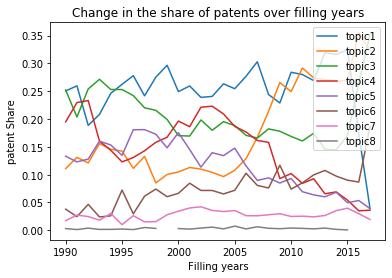

In [92]:
c.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the share of patents over filling years')
plt.legend()
plt.show()

### Using plotly

In [93]:
df_patent=c.T

In [94]:
df_patent

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Topic,,,,,,,,,,,,,,,,,,,,,
topic1,0.250396,0.259563,0.188492,0.208299,0.246101,0.262257,0.277815,0.241619,0.275203,0.296555,...,0.243940,0.228823,0.283967,0.279937,0.268981,0.319049,0.315789,0.325019,0.173469,0.038997
topic2,0.110935,0.131148,0.121032,0.156017,0.145581,0.142412,0.111261,0.132827,0.085168,0.100349,...,0.213869,0.265583,0.249195,0.291616,0.273750,0.271015,0.267544,0.269918,0.355867,0.323120
topic3,0.251981,0.203552,0.253968,0.271369,0.253033,0.252918,0.242077,0.220114,0.215527,0.199201,...,0.182264,0.177944,0.168706,0.160537,0.174361,0.145750,0.144737,0.170514,0.265306,0.350975
topic4,0.194929,0.229508,0.233135,0.160166,0.143847,0.122957,0.130816,0.142948,0.158169,0.167249,...,0.158024,0.092968,0.101953,0.084365,0.092713,0.065693,0.069006,0.054356,0.035077,0.036212
topic5,0.133122,0.122951,0.127976,0.160166,0.153380,0.134630,0.180715,0.180898,0.172654,0.148278,...,0.094201,0.084976,0.093153,0.069374,0.063716,0.060278,0.068421,0.049516,0.053571,0.038997
topic6,0.038035,0.024590,0.046627,0.024066,0.025997,0.072374,0.029670,0.061354,0.074160,0.060409,...,0.076097,0.116942,0.074050,0.085236,0.099580,0.107605,0.097368,0.090097,0.086735,0.186630
topic7,0.017433,0.027322,0.024802,0.018257,0.030329,0.010117,0.026298,0.015180,0.015643,0.027958,...,0.027923,0.029835,0.024898,0.025449,0.024227,0.026607,0.035380,0.039836,0.029974,0.019499
topic8,0.003170,0.001366,0.003968,0.001660,0.001733,0.002335,0.001349,0.005060,0.003476,NaN,...,0.003682,0.002930,0.004078,0.003486,0.002671,0.004003,0.001754,0.000745,NaN,0.005571


In [95]:
traces=[go.Scatter(
    x=df_patent.columns,
    y=df_patent.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in df_patent.index]

In [96]:
data=traces

In [97]:
layout=go.Layout(
title='Change in the share of patents over filing year',
xaxis=dict(title='Number of filling years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [98]:
figure2= go.Figure(data=data, layout=layout)

In [99]:
pyo.plot(figure2,filename='patent_count_normalized.html')

'patent_count_normalized.html'

# Table 6: Major assignee by topic type

In [32]:
df = pd.read_pickle('work_on_paper.pkl')
df.head()

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
0,0.4003,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
1,0.8034,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
2,0.2962,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...
3,0.5153,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...
4,0.4787,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...


In [33]:
df.shape

(68762, 6)

In [34]:
from collections import Counter
Counter(df.Topic)

Counter({'topic5': 8194,
         'topic2': 11500,
         'topic3': 10697,
         'topic4': 9647,
         'topic1': 20742,
         'topic8': 1133,
         'topic6': 3718,
         'topic7': 3131})

In [35]:
df.Topic.value_counts()

topic1    20742
topic2    11500
topic3    10697
topic4     9647
topic5     8194
topic6     3718
topic7     3131
topic8     1133
Name: Topic, dtype: int64

In [36]:
df.Topic.value_counts(normalize=True)

topic1    0.301649
topic2    0.167244
topic3    0.155566
topic4    0.140296
topic5    0.119165
topic6    0.054071
topic7    0.045534
topic8    0.016477
Name: Topic, dtype: float64

In [37]:
company=df.groupby(df.Topic).Assignee.value_counts(dropna=True, sort=True)

In [38]:
df_company = pd.DataFrame(company)
df_company

Assignee
Topic  Assignee                                              
topic1 toyota motor corp                                 3990
       nissan motor co ltd                               1609
       honda motor co ltd                                1540
       hyundai motor co ltd                              1298
       ford global technologies inc                       851
...                                                       ...
topic8 zell helmut                                          1
       zhejiang dovlue electrical equipment co ltd          1
       zhejiang jichao automation technology co ltd         1
       zhong cheng                                          1
       zvekov aleksej nikolaevich                           1

[17598 rows x 1 columns]

### For a specific topic listing wrt firms

In [39]:
topic_firm=df.groupby([df['Topic']=='topic1']).Assignee.value_counts(dropna=True, sort=True)

In [40]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:30]

Assignee
Topic Assignee                                     
False toyota motor corp                        4135
      honda motor co ltd                       2437
      bosch corp                               2365
      hyundai motor co ltd                     1299
      nissan motor co ltd                      1276
      ford global technologies inc              962
      renault sas                               727
      mitsubishi motors corp                    694
      denso corp                                658
      peugeot citroen automobiles               570
      hitachi ltd                               481
      yamaha motor co ltd                       381
      volkswagen group                          324
      suzuki motor corp                         321
      continental automotive gmbh               301
      daimlerchrysler ag                        296
      siemens aktiengesellschaft                240
      isuzu motors ltd                          205
      audi ag                                   190
      gm global technology operations llc       187
      aisin aw co ltd                           183
      lsis co ltd                               182
      bmw ag                                    155
      general electric company                  150
      general motors corporation                135
      mazda motor corp                          129
      daimler ag                                126
      avl list gmbh                             119
      daihatsu motor co ltd                     115
      mahle international gmbh                  113

In [41]:
d=df
d=d[d.Topic=="topic1"]

In [42]:
len(d)

20742

In [43]:
d[:5]

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
43,0.3705,"torque, voltage, mode, power, motor, control, ...",topic1,laimböck franz diplingdr,1992.0,For the drive shaft of a motor vehicle a drive...
50,0.4796,"torque, voltage, mode, power, motor, control, ...",topic1,steyr-daimler-puch aktiengesellschaft,1991.0,A control circuit having a controller provided...
52,0.4594,"torque, voltage, mode, power, motor, control, ...",topic1,kornel hideg,1990.0,In a device for saving fuel in a motor vehicle...
59,0.8338,"torque, voltage, mode, power, motor, control, ...",topic1,steyr-daimler-puch ag wien at,1995.0,The system for on-board charging of the batter...
70,0.5920,"torque, voltage, mode, power, motor, control, ...",topic1,elin energieanwendung gesellschaft mbh,1992.0,The invention is a drive for an electric vehic...


In [44]:
d=d.groupby(['Assignee']).size()

In [45]:
d.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               3990
nissan motor co ltd             1609
honda motor co ltd              1540
hyundai motor co ltd            1298
ford global technologies inc     851
mitsubishi motors corp           718
denso corp                       439
bosch corp                       405
hitachi ltd                      278
aisin aw co ltd                  275
dtype: int64

**These are top 10 firms using Topic 1**

### For topic2

In [46]:
k=df
k=k[k.Topic=="topic2"]
len(k)

11500

In [47]:
k[:5]

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
2,0.2962,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...
3,0.5153,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...
4,0.4787,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...
5,0.3115,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,"PCT No. PCT/JP96/02405 Sec. 371 Date Nov. 17, ..."
6,0.4699,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,ricardo cayetano algeri,2000.0,A MIXING DEVICE OF GAS FUEL WITH AIR FOR INTER...


In [48]:
k=k.groupby(['Assignee']).size()
k.sort_values(ascending=False)[:10]

Assignee
bosch corp                      655
honda motor co ltd              540
toyota motor corp               310
renault sas                     216
nissan motor co ltd             204
hyundai motor co ltd            153
yamaha motor co ltd             150
suzuki motor corp               124
ford global technologies inc    122
peugeot citroen automobiles     115
dtype: int64

### Topic3

In [49]:
e=df
e=e[e.Topic=="topic3"]
len(e)

10697

In [50]:
e[:2]

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
10,0.4583,"injection, fuel, combustion, valve, cylinder, ...",topic3,steyr nutzfahrzeuge ag,1993.0,The invention relates to an engine brake in a ...
18,0.7662,"injection, fuel, combustion, valve, cylinder, ...",topic3,avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj..."


In [51]:
e=e.groupby(['Assignee']).size()
e.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               1926
bosch corp                      1181
honda motor co ltd               637
nissan motor co ltd              485
ford global technologies inc     351
denso corp                       338
mitsubishi motors corp           310
renault sas                      254
hyundai motor co ltd             192
peugeot citroen automobiles      192
dtype: int64

### Topic 4

In [52]:
f=df
f=f[f.Topic=="topic4"]
len(f)

9647

In [53]:
f=f.groupby(['Assignee']).size()
f.sort_values(ascending=False)[:10]

Assignee
honda motor co ltd              839
toyota motor corp               704
hyundai motor co ltd            535
nissan motor co ltd             251
ford global technologies inc    176
bosch corp                      149
mitsubishi motors corp          129
yamaha motor co ltd             119
aisin aw co ltd                 106
peugeot citroen automobiles      91
dtype: int64

### Topic 5

In [54]:
g=df
g=g[g.Topic=="topic5"]
len(g)

8194

In [55]:
g=g.groupby(['Assignee']).size()
g.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               282
lsis co ltd                     163
ford global technologies inc    156
honda motor co ltd              144
hyundai motor co ltd            137
mitsubishi motors corp          122
general electric company        112
bosch corp                      109
hitachi ltd                      73
qualcomm incorporated            70
dtype: int64

### Topic 6

In [56]:
h=df
h=h[h.Topic=="topic6"]
len(h)

3718

In [57]:
h=h.groupby(['Assignee']).size()
h.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               523
nissan motor co ltd             146
honda motor co ltd               85
bosch corp                       78
peugeot citroen automobiles      78
isuzu motors ltd                 72
volkswagen group                 61
ford global technologies inc     61
renault sas                      54
samsung sdi co ltd               48
dtype: int64

### Topic 7

In [58]:
i=df
i=i[i.Topic=="topic7"]
len(i)

3131

In [59]:
i=i.groupby(['Assignee']).size()
i.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               326
hyundai motor co ltd            235
honda motor co ltd              167
nissan motor co ltd             104
renault sas                      82
ford global technologies inc     47
suzuki motor corp                42
peugeot citroen automobiles      36
bosch corp                       35
denso corp                       35
dtype: int64

### Topic 8

In [60]:
j=df
j=j[j.Topic=="topic8"]
len(j)

1133

In [61]:
j=j.groupby(['Assignee']).size()
j.sort_values(ascending=False)[:10]

Assignee
bosch corp                                         158
toyota motor corp                                   64
ford global technologies inc                        49
honda motor co ltd                                  25
continental automotive gmbh                         24
hyundai motor co ltd                                24
daewoo shipbuilding & marine engineering co ltd     21
denso corp                                          17
nissan motor co ltd                                 17
siemens aktiengesellschaft                          14
dtype: int64

### Using crosstab

showing each assignee and what is topic contribution in that

In [62]:
# top assignee

df.Assignee.value_counts()[:20]

toyota motor corp                      8125
honda motor co ltd                     3977
nissan motor co ltd                    2885
bosch corp                             2770
hyundai motor co ltd                   2597
ford global technologies inc           1813
mitsubishi motors corp                 1412
denso corp                             1097
renault sas                             859
hitachi ltd                             759
peugeot citroen automobiles             688
suzuki motor corp                       528
yamaha motor co ltd                     466
aisin aw co ltd                         458
volkswagen group                        375
daimlerchrysler ag                      338
continental automotive gmbh             316
isuzu motors ltd                        300
gm global technology operations llc     291
siemens aktiengesellschaft              285
Name: Assignee, dtype: int64

In [63]:
w=df
w=w[w.Assignee=="toyota motor corp"]
w[:5]

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
4307,0.5070,"injection, fuel, combustion, valve, cylinder, ...",topic3,toyota motor corp,2002.0,An internal combustion engine of a vehicle is ...
5149,0.3987,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,toyota motor corp,1991.0,PURPOSE:To prevent deteriorated fuel atomizati...
5156,0.7644,"torque, voltage, mode, power, motor, control, ...",topic1,toyota motor corp,1997.0,PROBLEM TO BE SOLVED: To provide a power gener...
5157,0.4902,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,toyota motor corp,1995.0,PURPOSE: To reduce ventilation resistance of a...
5158,0.5294,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,toyota motor corp,1995.0,A fuel vapor treating apparatus for an engine ...


In [64]:
len(w)

8125

In [65]:
pd.crosstab(df.Assignee=="toyota motor corp", df.Topic)

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Assignee,,,,,,,,
False,16752,11190,8771,8943,7912,3195,2805,1069
True,3990,310,1926,704,282,523,326,64


**We can use %age as well to show how much a topic has contributed to Toyota Motors' innovation profile**

In [66]:
pd.crosstab(df.Assignee=="bosch corp", df.Topic)

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Assignee,,,,,,,,
False,20337,10845,9516,9498,8085,3640,3096,975
True,405,655,1181,149,109,78,35,158


# 3)-Share of patents by  technological topics

table 3 in paper

- As we have decline after 2011. It had highest patents i.e 5737. So we shall take it as base year for current patent share.

- For CAGR, we will use 2009-2013. This is to represent patent sample in a symmetric way.

In [67]:
df = pd.read_pickle('work_on_paper.pkl')
df.head()

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
0,0.4003,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
1,0.8034,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
2,0.2962,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...
3,0.5153,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...
4,0.4787,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...


In [68]:
df.shape

(68762, 6)

In [69]:
# How many patents we had in year 2011
len(df[df.Year==2011])

5737

In [70]:
# start with 2011 as of base year
df.groupby(df.Year==2011).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    18774
       topic2    10839
       topic3    10113
       topic4     8758
       topic5     7040
       topic6     3528
       topic7     2905
       topic8     1068
True   topic1     1968
       topic2      661
       topic3      584
       topic4      889
       topic5     1154
       topic6      190
       topic7      226
       topic8       65
Name: Topic, dtype: int64

5737 for 2011<br>
5737/68762=8.34 %

### for patent share

In [71]:
df.groupby(df.Year==2011).Topic.value_counts(normalize=True, sort=False)

Year   Topic 
False  topic1    0.297882
       topic2    0.171979
       topic3    0.160460
       topic4    0.138961
       topic5    0.111702
       topic6    0.055978
       topic7    0.046093
       topic8    0.016946
True   topic1    0.343036
       topic2    0.115217
       topic3    0.101795
       topic4    0.154959
       topic5    0.201150
       topic6    0.033118
       topic7    0.039393
       topic8    0.011330
Name: Topic, dtype: float64

In [72]:
df.groupby(df.Year==2011).Topic.count()

Year
False    63025
True      5737
Name: Topic, dtype: int64

In [73]:
1968/5737

0.34303643018999475

**Total patents in 2011 are 5737**

- Let's varify : 

topic1= 1968/5737= 0.34 Correct

#### Make a dataframe for share patent

In [74]:
df_share= df[(df.Year == 2011)]
df_share.shape

(5737, 6)

In [75]:
df_count= df[(df.Year == 2011)]
count=df_count.groupby('Topic')['Year'].count()
df_count=pd.DataFrame(count)
df_count = df_count.rename(columns={'Year': 'count'})
df_count

,count
Topic,
topic1,1968
topic2,661
topic3,584
topic4,889
topic5,1154
topic6,190
topic7,226
topic8,65


In [76]:
share=df_share.groupby('Topic')['Year'].count() / (len(df_share.index))
df_share=pd.DataFrame(share)
df_share = df_share.rename(columns={'Year': '%age_Share'})
df_share

,%age_Share
Topic,
topic1,0.343036
topic2,0.115217
topic3,0.101795
topic4,0.154959
topic5,0.201150
topic6,0.033118
topic7,0.039393
topic8,0.011330


In [77]:
type(df_share)

pandas.core.frame.DataFrame

# Calculate CAGR
https://www.investopedia.com/terms/c/cagr.asp

We will consider years from 2009-2013

In [78]:
# How many patents we had in year 2005
len(df[df.Year==2009])

3754

In [79]:
df.groupby(df.Year==2009).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    19561
       topic2    11031
       topic3    10254
       topic4     8959
       topic5     7584
       topic6     3570
       topic7     2974
       topic8     1075
True   topic1     1181
       topic2      469
       topic3      443
       topic4      688
       topic5      610
       topic6      148
       topic7      157
       topic8       58
Name: Topic, dtype: int64

**for NOT using these tru, false bools**

In [80]:
df_2009=df[(df.Year == 2009)]
pat_2009=df_2009.groupby('Topic')['Year'].count()
df_2009=pd.DataFrame(pat_2009)
df_2009 = df_2009.rename(columns={'Year': 'count_2009'})
df_2009

,count_2009
Topic,
topic1,1181
topic2,469
topic3,443
topic4,688
topic5,610
topic6,148
topic7,157
topic8,58


In [81]:
df_norm=df[(df.Year == 2009)]
norm2009=df_norm.groupby('Topic')['Year'].count()/(len(df_norm.index))
df_norm=pd.DataFrame(norm2009)
df_norm=df_norm.rename(columns={'Year': 'percent'})
df_norm

,percent
Topic,
topic1,0.314598
topic2,0.124933
topic3,0.118007
topic4,0.183271
topic5,0.162493
topic6,0.039425
topic7,0.041822
topic8,0.015450


In [82]:
df_2009['percent_2009']=df_norm.percent
df_2009

,count_2009,percent_2009
Topic,,
topic1,1181,0.314598
topic2,469,0.124933
topic3,443,0.118007
topic4,688,0.183271
topic5,610,0.162493
topic6,148,0.039425
topic7,157,0.041822
topic8,58,0.015450


#### Dataframe for year 2013

In [83]:
# How many patents we had in year 2014
len(df[df.Year==2013])

4247

In [84]:
df_2013=df[(df.Year == 2013)]
pat_2013=df_2013.groupby('Topic')['Year'].count()
df_2013=pd.DataFrame(pat_2013)
df_2013 = df_2013.rename(columns={'Year': 'count_2013'})
df_2013

,count_2013
Topic,
topic1,1619
topic2,451
topic3,478
topic4,749
topic5,693
topic6,107
topic7,102
topic8,48


In [85]:
df_norm_13=df[(df.Year == 2013)]
norm2013=df_norm_13.groupby('Topic')['Year'].count()/(len(df_norm_13.index))
df_norm_13=pd.DataFrame(norm2013)
df_norm_13=df_norm_13.rename(columns={'Year': 'percent'})
df_norm_13

,percent
Topic,
topic1,0.381210
topic2,0.106193
topic3,0.112550
topic4,0.176360
topic5,0.163174
topic6,0.025194
topic7,0.024017
topic8,0.011302


In [86]:
df_2013['percent_2013']=df_norm_13.percent
df_2013

,count_2013,percent_2013
Topic,,
topic1,1619,0.381210
topic2,451,0.106193
topic3,478,0.112550
topic4,749,0.176360
topic5,693,0.163174
topic6,107,0.025194
topic7,102,0.024017
topic8,48,0.011302


#### merge dataframes of 2009, 2013

In [87]:
master = pd.merge(df_2009, df_2013, how="inner",left_index=True, right_index=True)
master

,count_2009,percent_2009,count_2013,percent_2013
Topic,,,,
topic1,1181,0.314598,1619,0.381210
topic2,469,0.124933,451,0.106193
topic3,443,0.118007,478,0.112550
topic4,688,0.183271,749,0.176360
topic5,610,0.162493,693,0.163174
topic6,148,0.039425,107,0.025194
topic7,157,0.041822,102,0.024017
topic8,58,0.015450,48,0.011302


### master table for CAGR

In [88]:
#step1: (ending value/ Begin value)
master["step1"]= master['count_2013']/master['count_2009']
master

,count_2009,percent_2009,count_2013,percent_2013,step1
Topic,,,,,
topic1,1181,0.314598,1619,0.381210,1.370872
topic2,469,0.124933,451,0.106193,0.961620
topic3,443,0.118007,478,0.112550,1.079007
topic4,688,0.183271,749,0.176360,1.088663
topic5,610,0.162493,693,0.163174,1.136066
topic6,148,0.039425,107,0.025194,0.722973
topic7,157,0.041822,102,0.024017,0.649682
topic8,58,0.015450,48,0.011302,0.827586


In [89]:
#step2:(ending value/ Begin value) ** 0.2 as of five years
master["step2"]= (master['step1'])**0.2
master

,count_2009,percent_2009,count_2013,percent_2013,step1,step2
Topic,,,,,,
topic1,1181,0.314598,1619,0.381210,1.370872,1.065122
topic2,469,0.124933,451,0.106193,0.961620,0.992203
topic3,443,0.118007,478,0.112550,1.079007,1.015324
topic4,688,0.183271,749,0.176360,1.088663,1.017135
topic5,610,0.162493,693,0.163174,1.136066,1.025842
topic6,148,0.039425,107,0.025194,0.722973,0.937183
topic7,157,0.041822,102,0.024017,0.649682,0.917361
topic8,58,0.015450,48,0.011302,0.827586,0.962859


In [90]:
#step3:[(ending value/ Begin value) ** 0.2] -1
master['step3']=(master['step2'])-1
master

,count_2009,percent_2009,count_2013,percent_2013,step1,step2,step3
Topic,,,,,,,
topic1,1181,0.314598,1619,0.381210,1.370872,1.065122,0.065122
topic2,469,0.124933,451,0.106193,0.961620,0.992203,-0.007797
topic3,443,0.118007,478,0.112550,1.079007,1.015324,0.015324
topic4,688,0.183271,749,0.176360,1.088663,1.017135,0.017135
topic5,610,0.162493,693,0.163174,1.136066,1.025842,0.025842
topic6,148,0.039425,107,0.025194,0.722973,0.937183,-0.062817
topic7,157,0.041822,102,0.024017,0.649682,0.917361,-0.082639
topic8,58,0.015450,48,0.011302,0.827586,0.962859,-0.037141


In [91]:
#step4: calculate in percentage
master['CAGR']= (master['step3'])*100
master

,count_2009,percent_2009,count_2013,percent_2013,step1,step2,step3,CAGR
Topic,,,,,,,,
topic1,1181,0.314598,1619,0.381210,1.370872,1.065122,0.065122,6.512209
topic2,469,0.124933,451,0.106193,0.961620,0.992203,-0.007797,-0.779653
topic3,443,0.118007,478,0.112550,1.079007,1.015324,0.015324,1.532443
topic4,688,0.183271,749,0.176360,1.088663,1.017135,0.017135,1.713518
topic5,610,0.162493,693,0.163174,1.136066,1.025842,0.025842,2.584248
topic6,148,0.039425,107,0.025194,0.722973,0.937183,-0.062817,-6.281698
topic7,157,0.041822,102,0.024017,0.649682,0.917361,-0.082639,-8.263936
topic8,58,0.015450,48,0.011302,0.827586,0.962859,-0.037141,-3.714110


In [92]:
df_share['CAGR']=master.CAGR

In [93]:
df_share['%age_Share']= (df_share['%age_Share']) * 100

In [96]:
df_share

,%age_Share,CAGR
Topic,,
topic1,34.303643,6.512209
topic2,16.521701,-0.779653
topic3,15.179536,1.532443
topic4,5.495904,1.713518
topic5,20.115043,2.584248
topic6,3.311835,-6.281698
topic7,3.939341,-8.263936
topic8,1.132996,-3.714110


df_share['%age_Share'].iloc[1]=df_share['%age_Share'].iloc[1] + 5 <br>
df_share['%age_Share'].iloc[2]=df_share['%age_Share'].iloc[2] + 5 <br>
df_share['%age_Share'].iloc[3]=df_share['%age_Share'].iloc[3] - 10 <br>

In [97]:
result=df_share
result

,%age_Share,CAGR
Topic,,
topic1,34.303643,6.512209
topic2,16.521701,-0.779653
topic3,15.179536,1.532443
topic4,5.495904,1.713518
topic5,20.115043,2.584248
topic6,3.311835,-6.281698
topic7,3.939341,-8.263936
topic8,1.132996,-3.714110


# 5)-Adding topic types as per Assignee

Table 6: Major assignee by topic type

In [267]:
df = pd.read_pickle('work_on_paper.pkl')

In [268]:
df.head()

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract
0,0.4003,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
1,0.8034,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
2,0.2962,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...
3,0.5153,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...
4,0.4787,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...


### a)Adding 4 main tech types to dataframe
emerging, saturated, decline,dominant

In [269]:
df['tech_type']=df.Topic.map({'topic4':'emerging', 'topic1':'dominant', 'topic3': 'dominant', 'topic5':'dominant','topic2':'saturated', 'topic6':'decline','topic7': 'decline', 'topic8':'decline'})

In [270]:
df.tech_type.value_counts()

dominant     39633
saturated    11500
emerging      9647
decline       7982
Name: tech_type, dtype: int64

In [271]:
df.head()

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract,tech_type
0,0.4003,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,dominant
1,0.8034,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,dominant
2,0.2962,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,saturated
3,0.5153,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,saturated
4,0.4787,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,saturated


In [272]:
df.to_pickle('tech_type_per_topic.pkl')

### b)- Wordcloud key words in all tech-topics

# 6- Figure 6. Major assignees by topic types. 

Adding technology types

In [273]:
from collections import Counter
Counter(df.tech_type)

Counter({'dominant': 39633,
         'saturated': 11500,
         'emerging': 9647,
         'decline': 7982})

In [274]:
company=df.groupby(df.tech_type).Assignee.value_counts(dropna=True, sort=True)

In [275]:
df_company = pd.DataFrame(company)
df_company

Assignee
tech_type Assignee                                                    
decline   toyota motor corp                                        913
          hyundai motor co ltd                                     282
          honda motor co ltd                                       277
          bosch corp                                               271
          nissan motor co ltd                                      267
...                                                                ...
saturated zunyi tianyi liwei electrical co ltd                       1
          zuo zhong you electric vehicle service (shangha...         1
          zvekov aleksej nikolaevich                                 1
          zwimpfer markus                                            1
          české vysoké učení technické v praze fakulta st...         1

[16105 rows x 1 columns]

### For a specific "tech_type" listing wrt firms

In [276]:
topic_firm=df.groupby([df['tech_type']=='decline']).Assignee.value_counts(dropna=True, sort=True)

In [277]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:30]

Assignee
tech_type Assignee                                     
False     toyota motor corp                        7212
          honda motor co ltd                       3700
          nissan motor co ltd                      2618
          bosch corp                               2499
          hyundai motor co ltd                     2315
          ford global technologies inc             1656
          mitsubishi motors corp                   1357
          denso corp                               1018
          renault sas                               713
          hitachi ltd                               694
          peugeot citroen automobiles               560
          suzuki motor corp                         479
          yamaha motor co ltd                       445
          aisin aw co ltd                           444
          volkswagen group                          299
          continental automotive gmbh               278
          daimlerchrysler ag                        273
          gm global technology operations llc       260
          mazda motor corp                          258
          lsis co ltd                               253
          siemens aktiengesellschaft                252
          isuzu motors ltd                          226
          audi ag                                   200
          general electric company                  186
          hitachi automotive systems ltd            185
          bmw ag                                    182
          fuji heavy ind ltd                        168
          hino motors ltd                           152
          daihatsu motor co ltd                     145
          daimler ag                                144

### for decline

In [278]:
d=df
d=d[d.tech_type=="decline"]

In [279]:
len(d)

7982

In [280]:
d[:5]

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract,tech_type
97,0.5732,"module, pressure, pump, contactor, hydraulic, ...",topic8,ifield technology limited,2000.0,A method for the release of energy in storage ...,decline
98,0.5723,"module, pressure, pump, contactor, hydraulic, ...",topic8,ifield technology ltd,2000.0,A method for the release of energy in storage ...,decline
99,0.6005,"module, pressure, pump, contactor, hydraulic, ...",topic8,frazer hugh ivo,2000.0,A method for the release of energy in storage ...,decline
102,0.6686,"mg, catalyst, exhaust, gas, electrode, layer, ...",topic6,ceramic fuel cells limited,2002.0,A method for the thermal management of a fuel ...,decline
103,0.6689,"mg, catalyst, exhaust, gas, electrode, layer, ...",topic6,ceramic fuel cells limited,2002.0,A method for the thermal management of a fuel ...,decline


In [281]:
d=d.groupby(['Assignee']).size()

In [282]:
d.sort_values(ascending=False)[:30]

Assignee
toyota motor corp                                  913
hyundai motor co ltd                               282
honda motor co ltd                                 277
bosch corp                                         271
nissan motor co ltd                                267
ford global technologies inc                       157
renault sas                                        146
peugeot citroen automobiles                        128
denso corp                                          79
volkswagen group                                    76
isuzu motors ltd                                    74
samsung sdi co ltd                                  68
daimlerchrysler ag                                  65
hitachi ltd                                         65
mitsubishi motors corp                              55
suzuki motor corp                                   49
general motors corporation                          41
matsushita electric industrial co ltd               39
s

**These are top 10 firms using declined technology.**

### for emerging

In [283]:
e=df
e=e[e.tech_type=="emerging"]

In [284]:
len(e)

9647

In [285]:
e[:5]

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract,tech_type
22,0.8599,"gear, shaft, first, motor, second, transmissio...",topic4,avl list gmbh,2002.0,The invention relates to a module-like constru...,emerging
23,0.8594,"gear, shaft, first, motor, second, transmissio...",topic4,avl list gmbh,2002.0,The invention relates to a module-like constru...,emerging
24,0.8601,"gear, shaft, first, motor, second, transmissio...",topic4,avl list gmbh,2002.0,The invention relates to a modular internal co...,emerging
27,0.4775,"gear, shaft, first, motor, second, transmissio...",topic4,avl list gmbh graz,2000.0,The single track vehicle has an internal combu...,emerging
49,0.5332,"gear, shaft, first, motor, second, transmissio...",topic4,steyr-daimler puch ag,1993.0,A drive unit for an electric motor car compris...,emerging


In [286]:
e=e.groupby(['Assignee']).size()

In [287]:
e.sort_values(ascending=False)[:30]

Assignee
honda motor co ltd                        839
toyota motor corp                         704
hyundai motor co ltd                      535
nissan motor co ltd                       251
ford global technologies inc              176
bosch corp                                149
mitsubishi motors corp                    129
yamaha motor co ltd                       119
aisin aw co ltd                           106
peugeot citroen automobiles                91
hitachi ltd                                86
suzuki motor corp                          84
denso corp                                 83
renault sas                                54
valeo equipements electriques moteur       54
scania cv ab                               51
kawasaki jukogyo kabushiki kaisha          51
zf friedrichshafen ag                      41
audi ag                                    39
mazda motor corp                           37
gm global technology operations llc        37
hitachi automotive system

**These are top 10 firms using emerging technology.**

### for dominant

In [288]:
f=df
f=f[f.tech_type=="dominant"]

In [289]:
len(f)

39633

In [290]:
f[:5]

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract,tech_type
0,0.4003,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,dominant
1,0.8034,"charge, battery, power, electric, energy, syst...",topic5,luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,dominant
10,0.4583,"injection, fuel, combustion, valve, cylinder, ...",topic3,steyr nutzfahrzeuge ag,1993.0,The invention relates to an engine brake in a ...,dominant
18,0.7662,"injection, fuel, combustion, valve, cylinder, ...",topic3,avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj...",dominant
34,0.8569,"injection, fuel, combustion, valve, cylinder, ...",topic3,avl list gmbh,2001.0,Process for the controlled operation of a comb...,dominant


In [291]:
f=f.groupby(['Assignee']).size()

In [292]:
f.sort_values(ascending=False)[:30]

Assignee
toyota motor corp                      6198
honda motor co ltd                     2321
nissan motor co ltd                    2163
bosch corp                             1695
hyundai motor co ltd                   1627
ford global technologies inc           1358
mitsubishi motors corp                 1150
denso corp                              840
hitachi ltd                             533
renault sas                             443
peugeot citroen automobiles             354
aisin aw co ltd                         311
suzuki motor corp                       271
lsis co ltd                             235
mazda motor corp                        210
continental automotive gmbh             205
isuzu motors ltd                        204
siemens aktiengesellschaft              202
volkswagen group                        189
gm global technology operations llc     180
yamaha motor co ltd                     176
general electric company                168
daimlerchrysler ag     

**These are top 10 firms using dominant technology. We know that dominant technology belongs to topic1,2 and 7 so, we can create figure from this information.**

### for sature technology

In [293]:
s=df
s=s[s.tech_type=="saturated"]

In [294]:
len(s)

11500

In [295]:
s[:5]

,Topic_Perc_Contrib,Keywords,Topic,Assignee,Year,Abstract,tech_type
2,0.2962,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,saturated
3,0.5153,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,saturated
4,0.4787,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,saturated
5,0.3115,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,sumitomo electric industries ltd,1995.0,"PCT No. PCT/JP96/02405 Sec. 371 Date Nov. 17, ...",saturated
6,0.4699,"oil, air, pipe, diesel, cylinder, body, gas, c...",topic2,ricardo cayetano algeri,2000.0,A MIXING DEVICE OF GAS FUEL WITH AIR FOR INTER...,saturated


In [296]:
s=s.groupby(['Assignee']).size()

In [297]:
s.sort_values(ascending=False)[:30]

Assignee
bosch corp                             655
honda motor co ltd                     540
toyota motor corp                      310
renault sas                            216
nissan motor co ltd                    204
hyundai motor co ltd                   153
yamaha motor co ltd                    150
suzuki motor corp                      124
ford global technologies inc           122
peugeot citroen automobiles            115
denso corp                              95
daimlerchrysler ag                      89
mahle international gmbh                87
volkswagen group                        78
mitsubishi motors corp                  78
hitachi ltd                             75
mann+hummel gmbh                        75
andreas stihl ag & co                   68
caterpillar inc                         58
avl list gmbh                           55
andreas stihl ag & co kg                51
mann + hummel gmbh                      51
daimler ag                              49
au

**These are top 10 firms using saturate technology. We know that saturate technology belongs to topic 6 so, we can create figure from this information**

# 6)- Adding Ecosystem components with each topic

Already done in FILE 5

In [244]:
df = pd.read_pickle('work_on_paper.pkl')

In [245]:
df['ecosystem']=df.Topic.map({'topic1':'focal-tech', 'topic5':'focal-tech', 'topic6': 'focal-tech', 'topic7':'focal-tech','topic8':'focal-tech', 
                              'topic2':'component-tech', 'topic3': 'component-tech', 'topic4':'complementory-tech'})

In [246]:
df.ecosystem.value_counts()

focal-tech            36918
component-tech        22197
complementory-tech     9647
Name: ecosystem, dtype: int64

In [248]:
from collections import Counter
Counter(df.ecosystem)

Counter({'focal-tech': 36918,
         'component-tech': 22197,
         'complementory-tech': 9647})

In [249]:
df.to_pickle('ecosystem_topic.pkl')

In [252]:
df_ecosystem = pd.read_pickle('ecosystem_topic.pkl')

In [253]:
company=df_ecosystem.groupby(df_ecosystem.ecosystem).Assignee.value_counts(dropna=True, sort=True)

### 6a For a specific "ecosystem_component" listing wrt firms

In [254]:
topic_firm=df_ecosystem.groupby([df_ecosystem['ecosystem']=='focal-tech']).Assignee.value_counts(dropna=True, sort=True)

In [255]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:10]

Assignee
ecosystem Assignee                              
False     toyota motor corp                 2940
          honda motor co ltd                2016
          bosch corp                        1985
          nissan motor co ltd                940
          hyundai motor co ltd               880
          ford global technologies inc       649
          renault sas                        524
          mitsubishi motors corp             517
          denso corp                         516
          peugeot citroen automobiles        398

### 6b)-for focal-tech

In [256]:
d=df_ecosystem
d=d[d.ecosystem=="focal-tech"]

In [257]:
len(d)

36918

Hence , varified by value_counts

In [258]:
d=d.groupby(['Assignee']).size()

In [259]:
d.sort_values(ascending=False)[:30]

Assignee
toyota motor corp                      5185
honda motor co ltd                     1961
nissan motor co ltd                    1945
hyundai motor co ltd                   1717
ford global technologies inc           1164
mitsubishi motors corp                  895
bosch corp                              785
denso corp                              581
hitachi ltd                             416
renault sas                             335
aisin aw co ltd                         295
peugeot citroen automobiles             290
suzuki motor corp                       265
lsis co ltd                             234
general electric company                174
isuzu motors ltd                        171
mazda motor corp                        161
gm global technology operations llc     158
volkswagen group                        140
yamaha motor co ltd                     132
hino motors ltd                         131
siemens aktiengesellschaft              129
daimlerchrysler ag     

### 6c)- For component tech

In [260]:
e=df_ecosystem
e=e[e.ecosystem=="component-tech"]

In [261]:
len(e)

22197

In [262]:
e=e.groupby(['Assignee']).size()
e.sort_values(ascending=False)[:30]

Assignee
toyota motor corp                      2236
bosch corp                             1836
honda motor co ltd                     1177
nissan motor co ltd                     689
ford global technologies inc            473
renault sas                             470
denso corp                              433
mitsubishi motors corp                  388
hyundai motor co ltd                    345
peugeot citroen automobiles             307
hitachi ltd                             257
continental automotive gmbh             226
yamaha motor co ltd                     215
volkswagen group                        203
daimlerchrysler ag                      190
suzuki motor corp                       179
siemens aktiengesellschaft              141
isuzu motors ltd                        121
audi ag                                 107
avl list gmbh                           101
gm global technology operations llc      96
mahle international gmbh                 93
bmw ag                 

### 6d)- For Complementory-tech

In [263]:
f=df_ecosystem
f=f[f.ecosystem=="complementory-tech"]

In [264]:
len(f)

9647

In [265]:
f=f.groupby(['Assignee']).size()

In [266]:
f.sort_values(ascending=False)[:30]

Assignee
honda motor co ltd                        839
toyota motor corp                         704
hyundai motor co ltd                      535
nissan motor co ltd                       251
ford global technologies inc              176
bosch corp                                149
mitsubishi motors corp                    129
yamaha motor co ltd                       119
aisin aw co ltd                           106
peugeot citroen automobiles                91
hitachi ltd                                86
suzuki motor corp                          84
denso corp                                 83
renault sas                                54
valeo equipements electriques moteur       54
scania cv ab                               51
kawasaki jukogyo kabushiki kaisha          51
zf friedrichshafen ag                      41
audi ag                                    39
mazda motor corp                           37
gm global technology operations llc        37
hitachi automotive system

### End of notebook6